# $\textbf{PROGRAMMING ASSIGNMENT}$
# $\textbf{Lecture 5: Linear Regression}$

1. Choose a data from https://archive.ics.uci.edu
2. Perform regression analysis on your chosen dataset

---

Data: [Energy Efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency)

## Regression Analysis on daily Building Heating Load based on Building Parameters

In [137]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNetCV, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split

In [138]:
energy_efficiency = fetch_ucirepo(id=242)
energy_efficiency.variables

,name,role,type,demographic,description,units,missing_values
0,X1,Feature,Continuous,None,Relative Compactness,None,no
1,X2,Feature,Continuous,None,Surface Area,None,no
2,X3,Feature,Continuous,None,Wall Area,None,no
3,X4,Feature,Continuous,None,Roof Area,None,no
4,X5,Feature,Continuous,None,Overall Height,None,no
5,X6,Feature,Integer,None,Orientation,None,no
6,X7,Feature,Continuous,None,Glazing Area,None,no
7,X8,Feature,Integer,None,Glazing Area Distribution,None,no
8,Y1,Target,Continuous,None,Heating Load,None,no
9,Y2,Target,Continuous,None,Cooling Load,None,no


In [139]:
# We only want weather parameters from the dataset
features = energy_efficiency.data.features
features.describe()

,X1,X2,X3,X4,X5,X6,X7,X8
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


In [140]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


In [141]:
features.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [142]:
# We only want heating load
target = energy_efficiency.data.targets["Y1"]
target.describe()

count    768.000000
mean      22.307201
std       10.090196
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Y1, dtype: float64

In [143]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Y1
Non-Null Count  Dtype  
--------------  -----  
768 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [144]:
target.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64

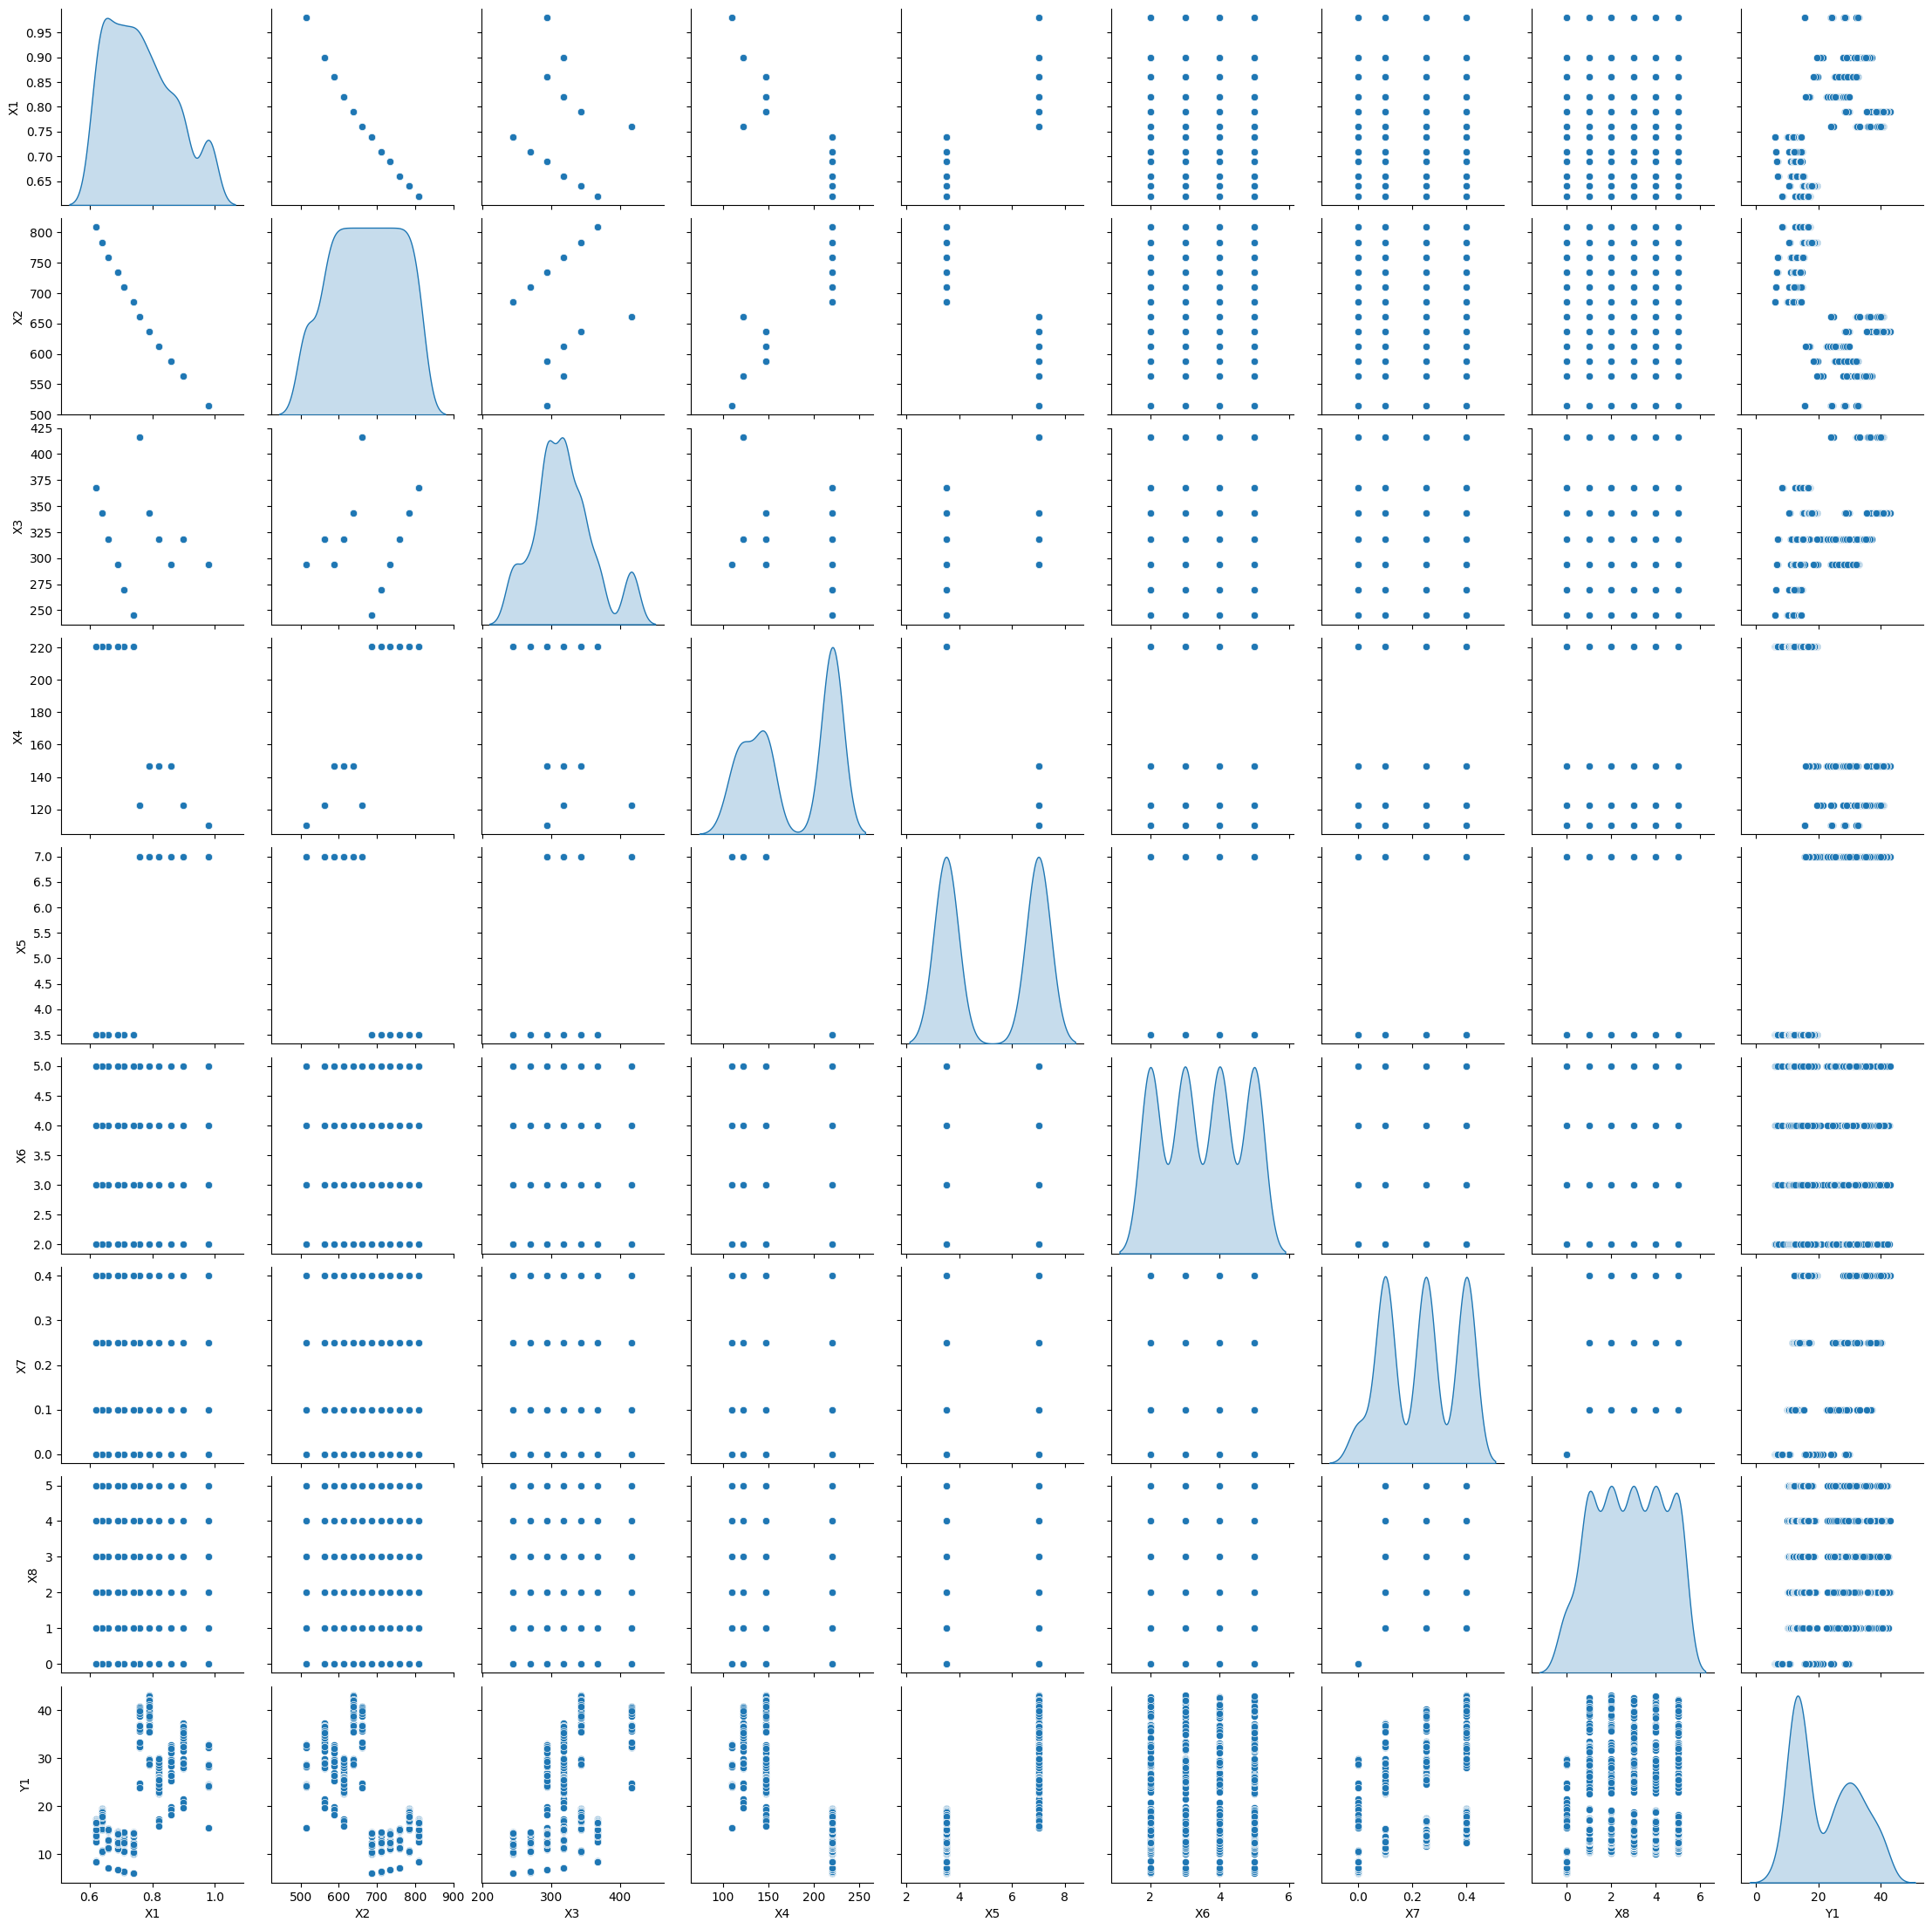

In [145]:
sns.pairplot(features.join(target),diag_kind='kde')

### $\textbf{Training-Testing Split}$

In [146]:
test_size = 0.2
random_state = 420 # for reproducibility

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=test_size, random_state=random_state)

In [147]:
features_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8
184,0.64,784.0,343.0,220.5,3.5,2,0.1,3
700,0.71,710.5,269.5,220.5,3.5,2,0.4,4
41,0.64,784.0,343.0,220.5,3.5,3,0.0,0
571,0.64,784.0,343.0,220.5,3.5,5,0.4,1
265,0.74,686.0,245.0,220.5,3.5,3,0.1,5


In [148]:
features_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8
305,0.79,637.0,343.0,147.0,7.0,3,0.25,1
134,0.66,759.5,318.5,220.5,3.5,4,0.10,2
635,0.86,588.0,294.0,147.0,7.0,5,0.40,3
602,0.74,686.0,245.0,220.5,3.5,4,0.40,2
596,0.76,661.5,416.5,122.5,7.0,2,0.40,2


In [149]:
target_train.head()

184    15.16
700    14.60
41     10.54
571    19.42
265    10.37
Name: Y1, dtype: float64

In [150]:
target_test.head()

305    40.03
134    11.33
635    31.84
602    14.18
596    40.78
Name: Y1, dtype: float64

### $\textbf{Linear Regression}$

In [151]:
linear_regression = LinearRegression()
linear_regression.fit(features_train, target_train)

LinearRegression()

In [152]:
linear_predictions = linear_regression.predict(features_test)

mae = mean_absolute_error(target_test, linear_predictions)
mse = mean_squared_error(target_test, linear_predictions)
rmse = np.sqrt(mse)

summary_metrics = pd.DataFrame({
    "model": ["LinearRegression"],
    "mae": [mae],
    "mse": [mse],
    "rmse": [rmse],
    "target_mean": target.mean()
})

summary_metrics

,model,mae,mse,rmse,target_mean
0,LinearRegression,1.898459,8.185271,2.860991,22.307201


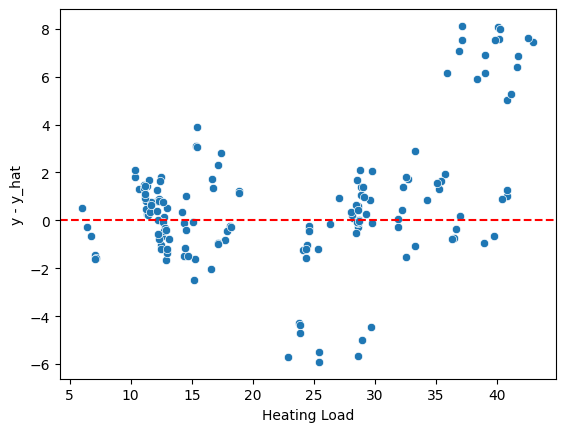

In [153]:
linear_diff = target_test - linear_predictions

sns.scatterplot(x=target_test, y=linear_diff)
plt.ylabel("y - y_hat")
plt.xlabel("Heating Load")
plt.axhline(y=0, color='r', linestyle='--')

Text(0.5, 9.444444444444438, 'Heating Load')

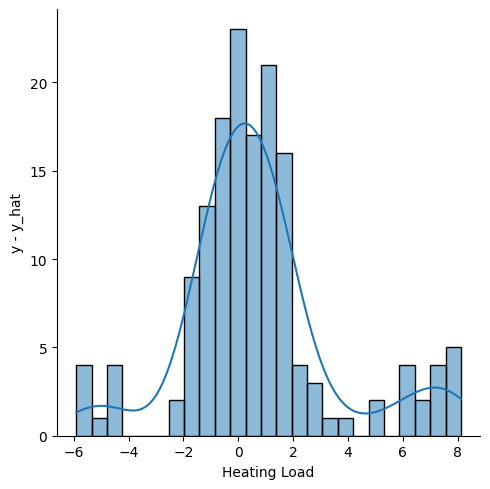

In [154]:
sns.displot(linear_diff, bins=25, kde=True)
plt.ylabel("y - y_hat")
plt.xlabel("Heating Load")

### $\textbf{Polynomial Regression}$

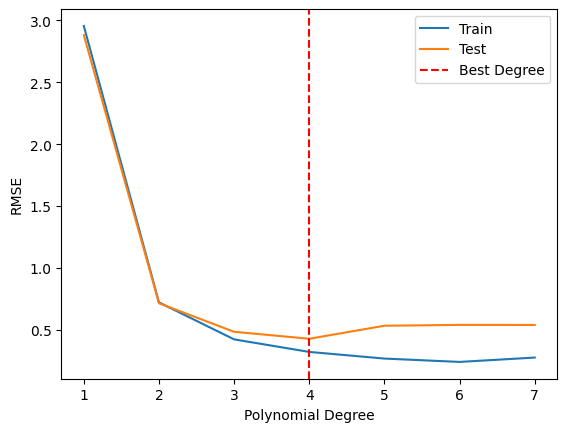

In [155]:
train_rmse = []
test_rmse = []

for degree in range(1, 10):
    poly_converter = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly_converter.fit_transform(features)

    x_train, x_test, y_train, y_test = train_test_split(poly_features, target, test_size=test_size, random_state=random_state)

    poly_regression = LinearRegression(fit_intercept=True)
    poly_regression.fit(x_train, y_train)

    train_pred = poly_regression.predict(x_train)
    test_pred = poly_regression.predict(x_test)

    train_rmse_res = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse_res = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse.append(train_rmse_res)
    test_rmse.append(test_rmse_res)

best_poly_degree = test_rmse.index(min(test_rmse)) + 1
plt.plot(range(1,8), train_rmse[:7],label='Train')
plt.plot(range(1,8), test_rmse[:7],label='Test')
plt.axvline(x=best_poly_degree, color='r', linestyle='--', label="Best Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.legend()

In [156]:
poly_converter = PolynomialFeatures(degree=best_poly_degree, include_bias=False)
poly_features = poly_converter.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(poly_features, target, test_size=test_size, random_state=random_state)

poly_regression = LinearRegression(fit_intercept=True)
poly_regression.fit(x_train, y_train)

LinearRegression()

In [157]:
poly_predictions = poly_regression.predict(x_test)

mae = mean_absolute_error(y_test, poly_predictions)
mse = mean_squared_error(y_test, poly_predictions)
rmse = np.sqrt(mse)

summary_metrics = summary_metrics._append({
    "model": f"Polynomial Regression ({best_poly_degree}-degree)",
    "mae": mae,
    "mse": mse,
    "rmse": rmse,
    "target_mean": target.mean()
}, ignore_index=True)

summary_metrics

,model,mae,mse,rmse,target_mean
0,LinearRegression,1.898459,8.185271,2.860991,22.307201
1,Polynomial Regression (4-degree),0.316803,0.183870,0.428801,22.307201


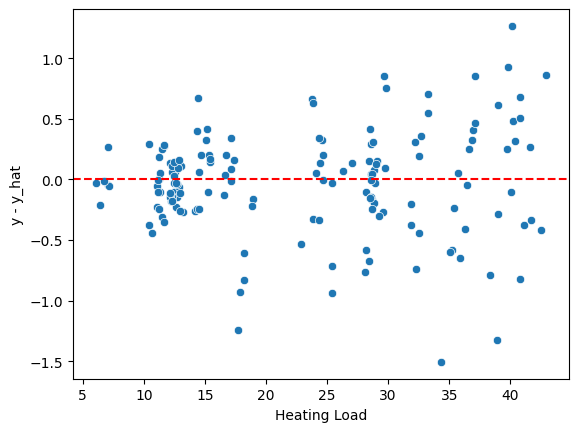

In [158]:
poly_diff = y_test - poly_predictions

sns.scatterplot(x=y_test, y=poly_diff)
plt.ylabel("y - y_hat")
plt.xlabel("Heating Load")
plt.axhline(y=0, color='r', linestyle='--')

Text(0.5, 9.444444444444438, 'Heating Load')

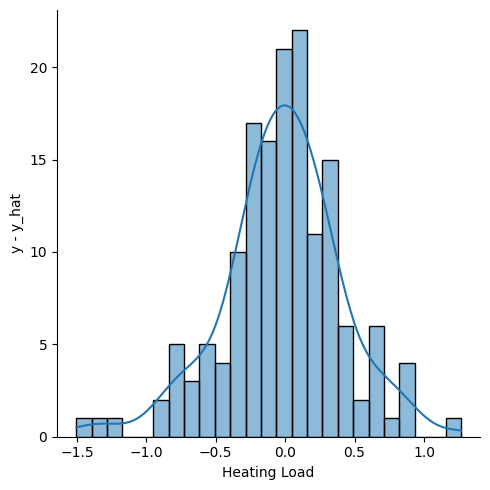

In [159]:
sns.displot(poly_diff, bins=25, kde=True)
plt.ylabel("y - y_hat")
plt.xlabel("Heating Load")

### $\textbf{Lasso Regression - L1 Regularization}$

In [160]:
scaler = StandardScaler()
scaler.fit(features_train)
x_train = scaler.transform(features_train)
x_test = scaler.transform(features_test)

In [161]:
lasso_cv = LassoCV(eps=0.1, n_alphas=100, cv=5)
lasso_cv.fit(x_train, target_train)

LassoCV(cv=5, eps=0.1)

In [162]:
lasso_predictions = lasso_cv.predict(x_test)

mae = mean_absolute_error(target_test, lasso_predictions)
mse = mean_squared_error(target_test, lasso_predictions)
rmse = np.sqrt(mse)

summary_metrics = summary_metrics._append({
    "model": "Lasso Regression",
    "mae": mae,
    "mse": mse,
    "rmse": rmse,
    "target_mean": target.mean()
}, ignore_index=True)

summary_metrics

,model,mae,mse,rmse,target_mean
0,LinearRegression,1.898459,8.185271,2.860991,22.307201
1,Polynomial Regression (4-degree),0.316803,0.183870,0.428801,22.307201
2,Lasso Regression,2.442084,12.374992,3.517811,22.307201


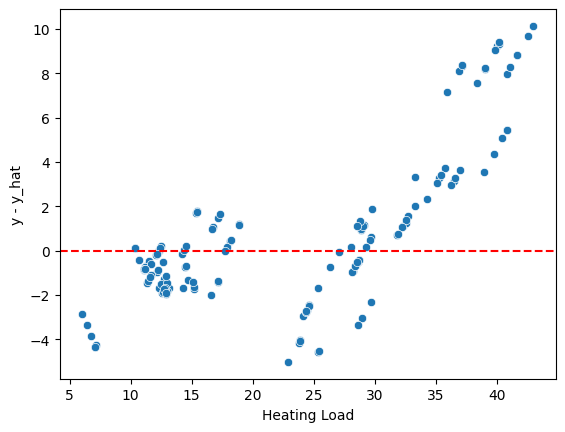

In [163]:
lasso_diff = target_test - lasso_predictions

sns.scatterplot(x=target_test, y=lasso_diff)
plt.ylabel("y - y_hat")
plt.xlabel("Heating Load")
plt.axhline(y=0, color='r', linestyle='--')

Text(0.5, 9.444444444444438, 'Heating Load')

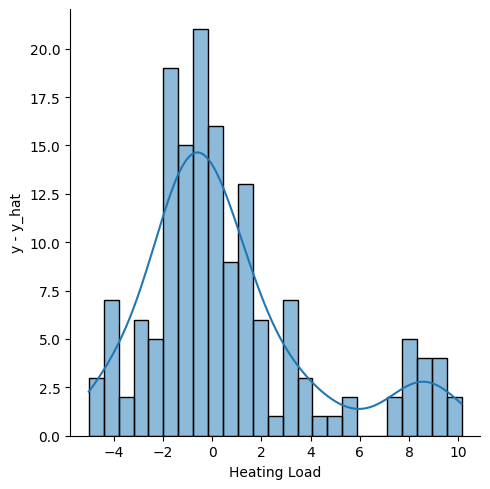

In [164]:
sns.displot(lasso_diff, bins=25, kde=True)
plt.ylabel("y - y_hat")
plt.xlabel("Heating Load")

### $\textbf{Ridge Regression - L2 Regularization}$

In [165]:
ridge_cv = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
ridge_cv.fit(x_train, target_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [166]:
ridge_predictions = ridge_cv.predict(x_test)

mae = mean_absolute_error(target_test, ridge_predictions)
mse = mean_squared_error(target_test, ridge_predictions)
rmse = np.sqrt(mse)

summary_metrics = summary_metrics._append({
    "model": "Ridge Regression",
    "mae": mae,
    "mse": mse,
    "rmse": rmse,
    "target_mean": target.mean()
}, ignore_index=True)

summary_metrics

,model,mae,mse,rmse,target_mean
0,LinearRegression,1.898459,8.185271,2.860991,22.307201
1,Polynomial Regression (4-degree),0.316803,0.183870,0.428801,22.307201
2,Lasso Regression,2.442084,12.374992,3.517811,22.307201
3,Ridge Regression,1.917192,8.299145,2.880824,22.307201


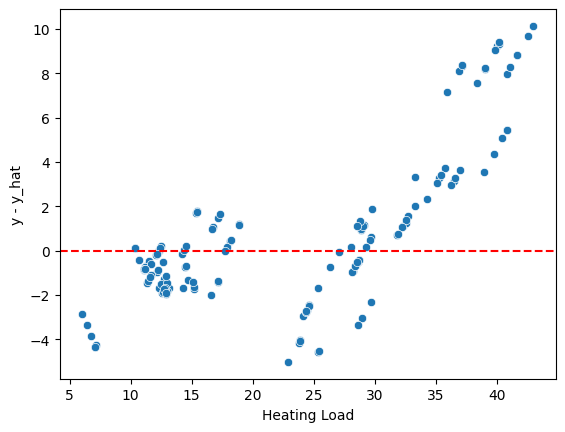

In [167]:
ridge_diff = target_test - lasso_predictions

sns.scatterplot(x=target_test, y=ridge_diff)
plt.ylabel("y - y_hat")
plt.xlabel("Heating Load")
plt.axhline(y=0, color='r', linestyle='--')

Text(0.5, 9.444444444444438, 'Heating Load')

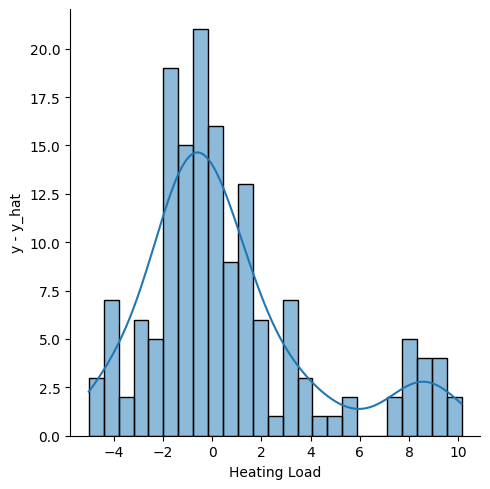

In [168]:
sns.displot(ridge_diff, bins=25, kde=True)
plt.ylabel("y - y_hat")
plt.xlabel("Heating Load")

### $\textbf{Elastic Net - L1 + L2 Regularization}$

In [169]:
elastic_regression = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], tol=0.01)
elastic_regression.fit(x_train, target_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [170]:
elastic_predictions = elastic_regression.predict(x_test)

mae = mean_absolute_error(target_test, elastic_predictions)
mse = mean_squared_error(target_test, elastic_predictions)
rmse = np.sqrt(mse)

summary_metrics = summary_metrics._append({
    "model": "Elastic Regression",
    "mae": mae,
    "mse": mse,
    "rmse": rmse,
    "target_mean": target.mean()
}, ignore_index=True)

summary_metrics

,model,mae,mse,rmse,target_mean
0,LinearRegression,1.898459,8.185271,2.860991,22.307201
1,Polynomial Regression (4-degree),0.316803,0.183870,0.428801,22.307201
2,Lasso Regression,2.442084,12.374992,3.517811,22.307201
3,Ridge Regression,1.917192,8.299145,2.880824,22.307201
4,Elastic Regression,1.927889,8.301651,2.881259,22.307201


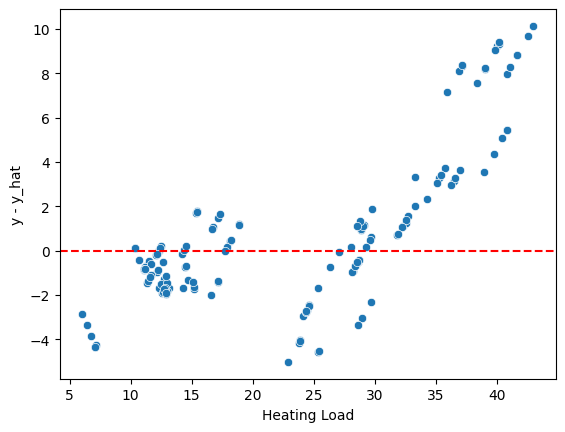

In [171]:
elastic_diff = target_test - lasso_predictions

sns.scatterplot(x=target_test, y=elastic_diff)
plt.ylabel("y - y_hat")
plt.xlabel("Heating Load")
plt.axhline(y=0, color='r', linestyle='--')

Text(0.5, 9.444444444444438, 'Heating Load')

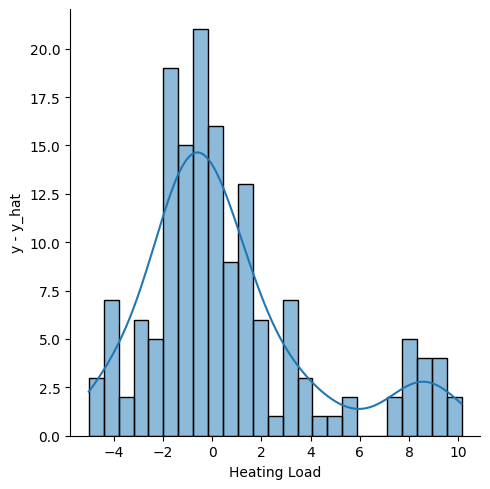

In [172]:
sns.displot(elastic_diff, bins=25, kde=True)
plt.ylabel("y - y_hat")
plt.xlabel("Heating Load")

### $\textbf{Best Model}$

In [173]:
summary_metrics.sort_values("rmse", ascending=True)

,model,mae,mse,rmse,target_mean
1,Polynomial Regression (4-degree),0.316803,0.183870,0.428801,22.307201
0,LinearRegression,1.898459,8.185271,2.860991,22.307201
3,Ridge Regression,1.917192,8.299145,2.880824,22.307201
4,Elastic Regression,1.927889,8.301651,2.881259,22.307201
2,Lasso Regression,2.442084,12.374992,3.517811,22.307201


In [174]:
poly_converter = PolynomialFeatures(degree=best_poly_degree, include_bias=False)
poly_features = poly_converter.fit_transform(features)

model = LinearRegression(fit_intercept=True)
model.fit(features, target)

LinearRegression()

### $\textbf{Results and Interpretations}$

In [175]:
pred = model.predict(features)

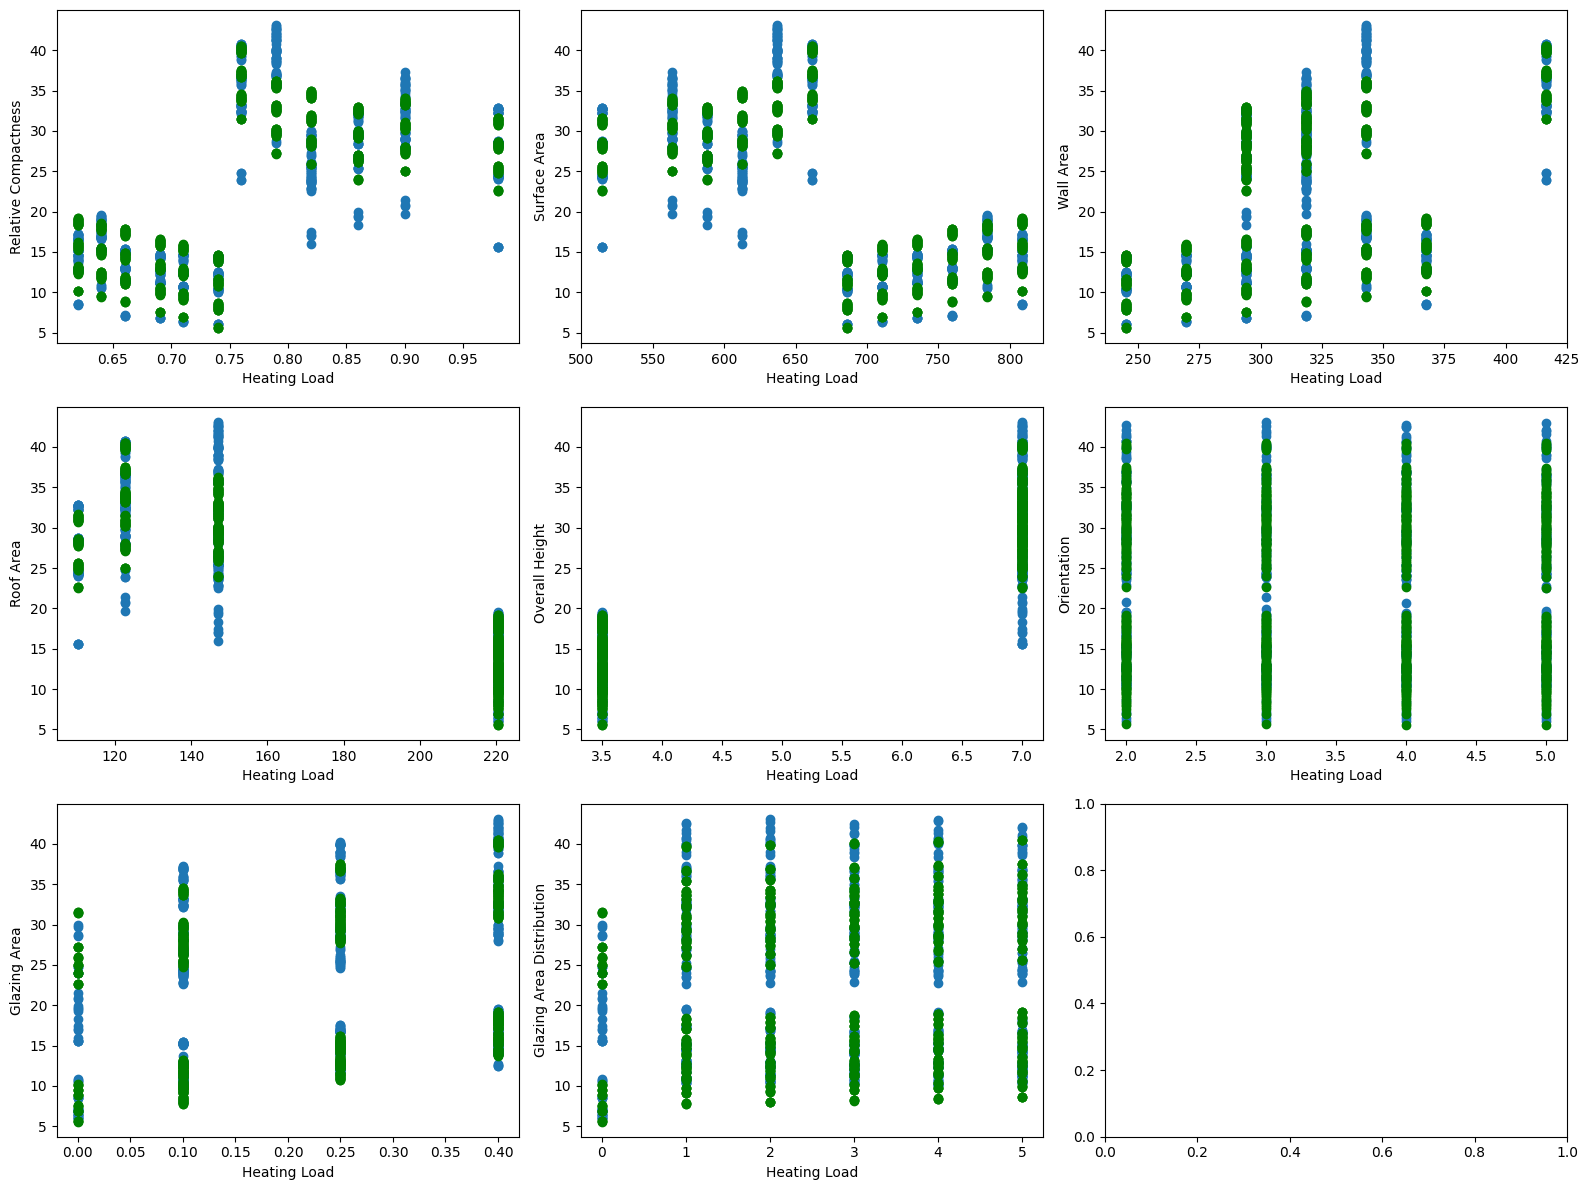

In [176]:
num_cols = 3
num_rows = len(features.columns) // num_cols + 1
fig,axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16,12))

indexed_vars = energy_efficiency.variables.set_index("name")

for i, feature in enumerate(features.columns):
    row = i // num_cols
    col = i % num_cols

    axes[row, col].plot(features[feature], target, 'o')
    axes[row, col].plot(features[feature], pred, 'o', color='green')
    axes[row, col].set_ylabel(indexed_vars.loc[feature, "description"])
    axes[row, col].set_xlabel("Heating Load")

plt.tight_layout();

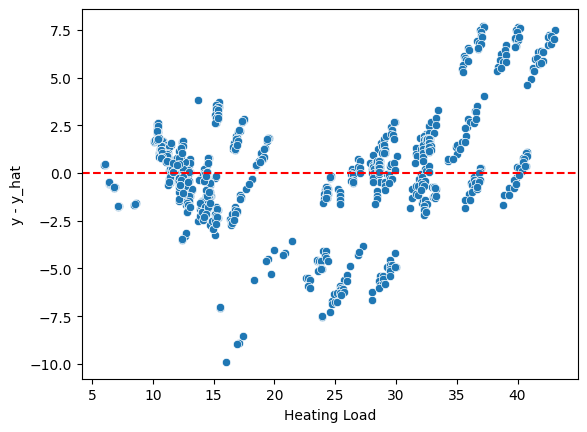

In [177]:
residuals = target - pred

sns.scatterplot(x=target, y=residuals)
plt.ylabel("y - y_hat")
plt.xlabel("Heating Load")
plt.axhline(y=0, color='r', linestyle='--')

In [178]:
coeff_df = pd.DataFrame(model.coef_,
                        [indexed_vars.loc[f, "description"] for f in features.columns],
                        columns=['Coefficient'])
coeff_df

,Coefficient
Relative Compactness,-6.477882e+01
Surface Area,3.605934e+09
Wall Area,-3.605934e+09
Roof Area,-7.211867e+09
Overall Height,4.169916e+00
Orientation,-2.333234e-02
Glazing Area,1.993268e+01
Glazing Area Distribution,2.037720e-01


1. **Relative Compactness (-64.78)**: **Inversely related with the heat load factor of the building.** For example, a decrease of 1 unit in relative compactness results in an increase of approximately 64.78 units in the heat load factor.
2. **Surface Area (3.61e+09)**: **Strong positive relationship with the heat load factor of the building.** For example, an increase of 1 unit in surface area results in an increase of approximately 3.61 billion units in the heat load factor.
3. **Wall Area (-3.61e+09)**: **Strong inverse relationship with the heat load factor of the building.** For example, an increase of 1 unit in wall area results in a decrease of approximately 3.61 billion units in the heat load factor.
4. **Roof Area (-7.21e+09)**: **Very strong inverse relationship with the heat load factor of the building.** For example, an increase of 1 unit in roof area results in a decrease of approximately 7.21 billion units in the heat load factor.
5. **Overall Height (4.17)**: **Positive relationship with the heat load factor of the building.** For example, an increase of 1 unit in overall height results in an increase of approximately 4.17 units in the heat load factor.
6. **Orientation (-0.0233)**: **Slight inverse relationship with the heat load factor of the building.** For example, an increase of 1 unit in orientation results in a decrease of approximately 0.0233 units in the heat load factor.
7. **Glazing Area (19.93)**: **Positive relationship with the heat load factor of the building.** For example, an increase of 1 unit in glazing area results in an increase of approximately 19.93 units in the heat load factor.
8. **Glazing Area Distribution (0.204)**: **Slight positive relationship with the heat load factor of the building.** For example, an increase of 1 unit in glazing area distribution results in an increase of approximately 0.204 units in the heat load factor.